# Setup

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read data

In [2]:
df = pd.read_csv("trials_with_predictions.csv")

# Preprocessing

In [3]:
# Rename POSITIVE to Positive and NEGATIVE to Negative
df = df.replace({"POSITIVE": "Positive", "NEGATIVE": "Negative"})

# Analyze Characteristics

In [4]:
# Count the number and percentages of positive and negative trials
print(df["Annotation_accept"].value_counts(normalize=False))
print(df["Annotation_accept"].value_counts(normalize=True))


Annotation_accept
Positive    226
Negative    174
Name: count, dtype: int64
Annotation_accept
Positive    0.565
Negative    0.435
Name: proportion, dtype: float64


# Analyze Performance


## Conclusion

### GPT-4o mini

In [6]:
# Create a crosstab of the GPT-4o mini predictions when reading only the conclusion and the true labels
gpt4omini_conclusion_crosstab = pd.crosstab(
    df["Annotation_accept"], df["gpt4omini_temp100_conclusion_response_raw"]
)

# Calculate true positives, false positives, false negatives, and true negatives
gpt4omini_conclusion_tp = gpt4omini_conclusion_crosstab.loc["Positive", "Positive"]
gpt4omini_conclusion_fp = gpt4omini_conclusion_crosstab.loc["Negative", "Positive"]
gpt4omini_conclusion_fn = gpt4omini_conclusion_crosstab.loc["Positive", "Negative"]
gpt4omini_conclusion_tn = gpt4omini_conclusion_crosstab.loc["Negative", "Negative"]

# Calculate the accuracy, precision, recall, and F1 score
gpt4omini_conclusion_accuracy = (gpt4omini_conclusion_tp + gpt4omini_conclusion_tn) / (gpt4omini_conclusion_tp + gpt4omini_conclusion_tn + gpt4omini_conclusion_fp + gpt4omini_conclusion_fn)
gpt4omini_conclusion_precision = gpt4omini_conclusion_tp / (gpt4omini_conclusion_tp + gpt4omini_conclusion_fp)
gpt4omini_conclusion_recall = gpt4omini_conclusion_tp / (gpt4omini_conclusion_tp + gpt4omini_conclusion_fn)
gpt4omini_conclusion_f1 = 2 * (gpt4omini_conclusion_precision * gpt4omini_conclusion_recall) / (gpt4omini_conclusion_precision + gpt4omini_conclusion_recall)

# Calculate the 95% confidence interval for the accuracy, precision, recall, and F1 score
gpt4omini_conclusion_accuracy_ci = 1.96 * np.sqrt((gpt4omini_conclusion_accuracy * (1 - gpt4omini_conclusion_accuracy)) / df.shape[0])
gpt4omini_conclusion_precision_ci = 1.96 * np.sqrt((gpt4omini_conclusion_precision * (1 - gpt4omini_conclusion_precision)) / df.shape[0])
gpt4omini_conclusion_recall_ci = 1.96 * np.sqrt((gpt4omini_conclusion_recall * (1 - gpt4omini_conclusion_recall)) / df.shape[0])
gpt4omini_conclusion_f1_ci = 1.96 * np.sqrt((gpt4omini_conclusion_f1 * (1 - gpt4omini_conclusion_f1)) / df.shape[0])

# Print the results
print(f"GPT-4o mini Conclusion Accuracy: {gpt4omini_conclusion_accuracy:.2f} ({gpt4omini_conclusion_accuracy - gpt4omini_conclusion_accuracy_ci:.2f} - {gpt4omini_conclusion_accuracy + gpt4omini_conclusion_accuracy_ci:.2f})")
print(f"GPT-4o mini Conclusion Precision: {gpt4omini_conclusion_precision:.2f} ({gpt4omini_conclusion_precision - gpt4omini_conclusion_precision_ci:.2f} - {gpt4omini_conclusion_precision + gpt4omini_conclusion_precision_ci:.2f})")
print(f"GPT-4o mini Conclusion Recall: {gpt4omini_conclusion_recall:.2f} ({gpt4omini_conclusion_recall - gpt4omini_conclusion_recall_ci:.2f} - {gpt4omini_conclusion_recall + gpt4omini_conclusion_recall_ci:.2f})")
print(f"GPT-4o mini Conclusion F1: {gpt4omini_conclusion_f1:.2f} ({gpt4omini_conclusion_f1 - gpt4omini_conclusion_f1_ci:.2f} - {gpt4omini_conclusion_f1 + gpt4omini_conclusion_f1_ci:.2f})")


GPT-4o mini Conclusion Accuracy: 0.85 (0.82 - 0.88)
GPT-4o mini Conclusion Precision: 0.90 (0.87 - 0.93)
GPT-4o mini Conclusion Recall: 0.83 (0.79 - 0.86)
GPT-4o mini Conclusion F1: 0.86 (0.83 - 0.90)


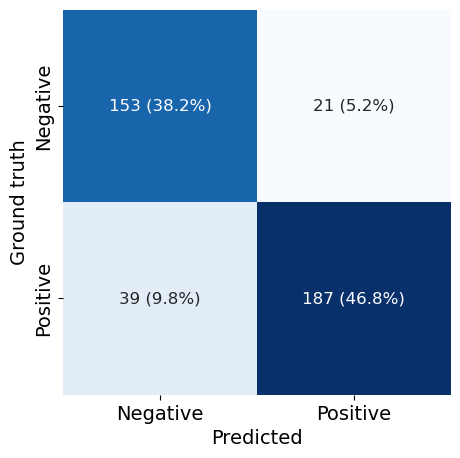

In [7]:
# Create a plot of the confusion matrix
fig = plt.figure(figsize=(5, 5))

# Create the labels with counts and percentages
labels_gpt4omini_conclusion = gpt4omini_conclusion_crosstab.values.astype(str)
labels_gpt4omini_conclusion[0, 0] = f"{labels_gpt4omini_conclusion[0, 0]} ({100 * gpt4omini_conclusion_tn / (df.shape[0]):.1f}%)"
labels_gpt4omini_conclusion[0, 1] = f"{labels_gpt4omini_conclusion[0, 1]} ({100 * gpt4omini_conclusion_fp / (df.shape[0]):.1f}%)"
labels_gpt4omini_conclusion[1, 0] = f"{labels_gpt4omini_conclusion[1, 0]} ({100 * gpt4omini_conclusion_fn / (df.shape[0]):.1f}%)"
labels_gpt4omini_conclusion[1, 1] = f"{labels_gpt4omini_conclusion[1, 1]} ({100 * gpt4omini_conclusion_tp / (df.shape[0]):.1f}%)"

# Plot the confusion matrix
plt.rcParams.update({'font.size': 14})  # Increase font size
sns.heatmap(gpt4omini_conclusion_crosstab, annot=labels_gpt4omini_conclusion, fmt="", cmap="Blues", annot_kws={'size': 12})
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Ground truth", fontsize=14)
# Remove the colorbar but keep the width of the heatmap
plt.gca().collections[0].colorbar.remove()
plt.savefig("plots/gpt4omini_conclusion_confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()  

### GPT-4o

In [8]:
# Create a crosstab of the GPT-4o predictions when reading only the conclusions and the true labels
gpt4o_conclusion_crosstab = pd.crosstab(
    df["Annotation_accept"], df["gpt4o_temp100_conclusion_response_raw"]
)

# Calculate the true positives, false positives, false negatives, and true negatives
gpt4o_conclusion_tp = gpt4o_conclusion_crosstab.loc["Positive", "Positive"]
gpt4o_conclusion_fp = gpt4o_conclusion_crosstab.loc["Negative", "Positive"]
gpt4o_conclusion_fn = gpt4o_conclusion_crosstab.loc["Positive", "Negative"]
gpt4o_conclusion_tn = gpt4o_conclusion_crosstab.loc["Negative", "Negative"]

# Calculate the accuracy, precision, recall, and F1 score
gpt4o_conclusion_accuracy = (gpt4o_conclusion_tp + gpt4o_conclusion_tn) / (gpt4o_conclusion_tp + gpt4o_conclusion_tn + gpt4o_conclusion_fp + gpt4o_conclusion_fn)
gpt4o_conclusion_precision = gpt4o_conclusion_tp / (gpt4o_conclusion_tp + gpt4o_conclusion_fp)
gpt4o_conclusion_recall = gpt4o_conclusion_tp / (gpt4o_conclusion_tp + gpt4o_conclusion_fn)
gpt4o_conclusion_f1 = 2 * (gpt4o_conclusion_precision * gpt4o_conclusion_recall) / (gpt4o_conclusion_precision + gpt4o_conclusion_recall)

# Calculate the 95% confidence interval for the accuracy, precision, recall, and F1 score
gpt4o_conclusion_accuracy_ci = 1.96 * np.sqrt((gpt4o_conclusion_accuracy * (1 - gpt4o_conclusion_accuracy)) / df.shape[0])
gpt4o_conclusion_precision_ci = 1.96 * np.sqrt((gpt4o_conclusion_precision * (1 - gpt4o_conclusion_precision)) / df.shape[0])
gpt4o_conclusion_recall_ci = 1.96 * np.sqrt((gpt4o_conclusion_recall * (1 - gpt4o_conclusion_recall)) / df.shape[0])
gpt4o_conclusion_f1_ci = 1.96 * np.sqrt((gpt4o_conclusion_f1 * (1 - gpt4o_conclusion_f1)) / df.shape[0])

# Print the results
print(f"GPT-4o Conclusion Accuracy: {gpt4o_conclusion_accuracy:.2f} ({gpt4o_conclusion_accuracy - gpt4o_conclusion_accuracy_ci:.2f} - {gpt4o_conclusion_accuracy + gpt4o_conclusion_accuracy_ci:.2f})")
print(f"GPT-4o Conclusion Precision: {gpt4o_conclusion_precision:.2f} ({gpt4o_conclusion_precision - gpt4o_conclusion_precision_ci:.2f} - {gpt4o_conclusion_precision + gpt4o_conclusion_precision_ci:.2f})")
print(f"GPT-4o Conclusion Recall: {gpt4o_conclusion_recall:.2f} ({gpt4o_conclusion_recall - gpt4o_conclusion_recall_ci:.2f} - {gpt4o_conclusion_recall + gpt4o_conclusion_recall_ci:.2f})")
print(f"GPT-4o Conclusion F1: {gpt4o_conclusion_f1:.2f} ({gpt4o_conclusion_f1 - gpt4o_conclusion_f1_ci:.2f} - {gpt4o_conclusion_f1 + gpt4o_conclusion_f1_ci:.2f})")

GPT-4o Conclusion Accuracy: 0.83 (0.80 - 0.87)
GPT-4o Conclusion Precision: 0.93 (0.90 - 0.95)
GPT-4o Conclusion Recall: 0.77 (0.73 - 0.81)
GPT-4o Conclusion F1: 0.84 (0.80 - 0.88)


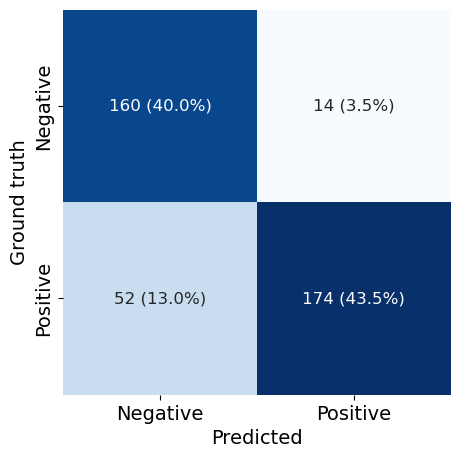

In [9]:
# Create a plot of the confusion matrix
fig = plt.figure(figsize=(5, 5))

# Create the labels with counts and percentages
labels_gpt4o_conclusion = gpt4o_conclusion_crosstab.values.astype(str)
labels_gpt4o_conclusion[0, 0] = f"{labels_gpt4o_conclusion[0, 0]} ({100 * gpt4o_conclusion_tn / (df.shape[0]):.1f}%)"
labels_gpt4o_conclusion[0, 1] = f"{labels_gpt4o_conclusion[0, 1]} ({100 * gpt4o_conclusion_fp / (df.shape[0]):.1f}%)"
labels_gpt4o_conclusion[1, 0] = f"{labels_gpt4o_conclusion[1, 0]} ({100 * gpt4o_conclusion_fn / (df.shape[0]):.1f}%)"
labels_gpt4o_conclusion[1, 1] = f"{labels_gpt4o_conclusion[1, 1]} ({100 * gpt4o_conclusion_tp / (df.shape[0]):.1f}%)"

# Plot the confusion matrix
plt.rcParams.update({'font.size': 14})  # Increase font size
sns.heatmap(gpt4o_conclusion_crosstab, annot=labels_gpt4o_conclusion, fmt="", cmap="Blues", annot_kws={'size': 12})
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Ground truth", fontsize=14)
# Remove the colorbar but keep the width of the heatmap
plt.gca().collections[0].colorbar.remove()
plt.savefig("plots/gpt4o_conclusion_confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()  

## Methods and Conclusion

### GPT-4o mini

In [10]:
# Create a crosstab of the GPT-4o mini predictions when reading only the methods/conclusion and the true labels
gpt4omini_methods_conclusion_crosstab = pd.crosstab(
    df["Annotation_accept"], df["gpt4omini_temp100_methods_conclusion_response_raw"]
)

# Calculate the true positives, false positives, false negatives, and true negatives
gpt4omini_methods_conclusion_tp = gpt4omini_methods_conclusion_crosstab.loc["Positive", "Positive"]
gpt4omini_methods_conclusion_fp = gpt4omini_methods_conclusion_crosstab.loc["Negative", "Positive"]
gpt4omini_methods_conclusion_fn = gpt4omini_methods_conclusion_crosstab.loc["Positive", "Negative"]
gpt4omini_methods_conclusion_tn = gpt4omini_methods_conclusion_crosstab.loc["Negative", "Negative"]

# Calculate the accuracy, precision, recall, and F1 score
gpt4omini_methods_conclusion_accuracy = (gpt4omini_methods_conclusion_tp + gpt4omini_methods_conclusion_tn) / (gpt4omini_methods_conclusion_tp + gpt4omini_methods_conclusion_tn + gpt4omini_methods_conclusion_fp + gpt4omini_methods_conclusion_fn)
gpt4omini_methods_conclusion_precision = gpt4omini_methods_conclusion_tp / (gpt4omini_methods_conclusion_tp + gpt4omini_methods_conclusion_fp)
gpt4omini_methods_conclusion_recall = gpt4omini_methods_conclusion_tp / (gpt4omini_methods_conclusion_tp + gpt4omini_methods_conclusion_fn)
gpt4omini_methods_conclusion_f1 = 2 * (gpt4omini_methods_conclusion_precision * gpt4omini_methods_conclusion_recall) / (gpt4omini_methods_conclusion_precision + gpt4omini_methods_conclusion_recall)

# Calculate the 95% confidence interval for the accuracy, precision, recall, and F1 score
gpt4omini_methods_conclusion_accuracy_ci = 1.96 * np.sqrt((gpt4omini_methods_conclusion_accuracy * (1 - gpt4omini_methods_conclusion_accuracy)) / df.shape[0])
gpt4omini_methods_conclusion_precision_ci = 1.96 * np.sqrt((gpt4omini_methods_conclusion_precision * (1 - gpt4omini_methods_conclusion_precision)) / df.shape[0])
gpt4omini_methods_conclusion_recall_ci = 1.96 * np.sqrt((gpt4omini_methods_conclusion_recall * (1 - gpt4omini_methods_conclusion_recall)) / df.shape[0])
gpt4omini_methods_conclusion_f1_ci = 1.96 * np.sqrt((gpt4omini_methods_conclusion_f1 * (1 - gpt4omini_methods_conclusion_f1)) / df.shape[0])

# Print the results
print(f"GPT-4o mini Methods and Conclusion Accuracy: {gpt4omini_methods_conclusion_accuracy:.2f} ({gpt4omini_methods_conclusion_accuracy - gpt4omini_methods_conclusion_accuracy_ci:.2f} - {gpt4omini_methods_conclusion_accuracy + gpt4omini_methods_conclusion_accuracy_ci:.2f})")
print(f"GPT-4o mini Methods and Conclusion Precision: {gpt4omini_methods_conclusion_precision:.2f} ({gpt4omini_methods_conclusion_precision - gpt4omini_methods_conclusion_precision_ci:.2f} - {gpt4omini_methods_conclusion_precision + gpt4omini_methods_conclusion_precision_ci:.2f})")
print(f"GPT-4o mini Methods and Conclusion Recall: {gpt4omini_methods_conclusion_recall:.2f} ({gpt4omini_methods_conclusion_recall - gpt4omini_methods_conclusion_recall_ci:.2f} - {gpt4omini_methods_conclusion_recall + gpt4omini_methods_conclusion_recall_ci:.2f})")
print(f"GPT-4o mini Methods and Conclusion F1: {gpt4omini_methods_conclusion_f1:.2f} ({gpt4omini_methods_conclusion_f1 - gpt4omini_methods_conclusion_f1_ci:.2f} - {gpt4omini_methods_conclusion_f1 + gpt4omini_methods_conclusion_f1_ci:.2f})")

GPT-4o mini Methods and Conclusion Accuracy: 0.86 (0.83 - 0.90)
GPT-4o mini Methods and Conclusion Precision: 0.93 (0.90 - 0.95)
GPT-4o mini Methods and Conclusion Recall: 0.83 (0.79 - 0.86)
GPT-4o mini Methods and Conclusion F1: 0.87 (0.84 - 0.91)


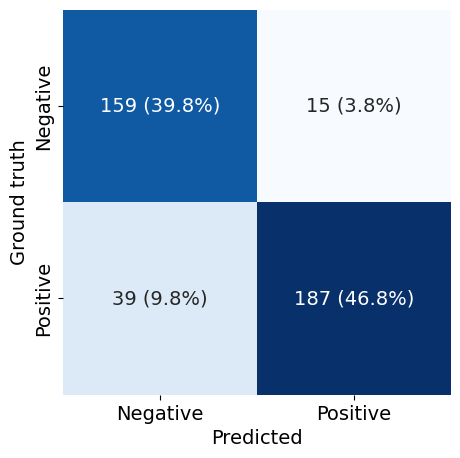

In [11]:
# Create a plot of the confusion matrix
fig = plt.figure(figsize=(5, 5))

# Create the labels with counts and percentages
labels_gpt4omini_methods_conclusion = gpt4omini_methods_conclusion_crosstab.values.astype(str)
labels_gpt4omini_methods_conclusion[0, 0] = f"{labels_gpt4omini_methods_conclusion[0, 0]} ({100 * gpt4omini_methods_conclusion_tn / (df.shape[0]):.1f}%)"
labels_gpt4omini_methods_conclusion[0, 1] = f"{labels_gpt4omini_methods_conclusion[0, 1]} ({100 * gpt4omini_methods_conclusion_fp / (df.shape[0]):.1f}%)"
labels_gpt4omini_methods_conclusion[1, 0] = f"{labels_gpt4omini_methods_conclusion[1, 0]} ({100 * gpt4omini_methods_conclusion_fn / (df.shape[0]):.1f}%)"
labels_gpt4omini_methods_conclusion[1, 1] = f"{labels_gpt4omini_methods_conclusion[1, 1]} ({100 * gpt4omini_methods_conclusion_tp / (df.shape[0]):.1f}%)"

# Plot the confusion matrix
plt.rcParams.update({"font.size": 14})  # Increase font size
sns.heatmap(gpt4omini_methods_conclusion_crosstab, annot=labels_gpt4omini_methods_conclusion, fmt="", cmap="Blues")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Ground truth", fontsize=14)
# Remove the colorbar but keep the width of the heatmap
plt.gca().collections[0].colorbar.remove()
plt.savefig(
    "plots/gpt4omini_methods_conclusion_confusion_matrix.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()  

### GPT-4o

In [12]:
# Create a crosstab of the GPT-4o predictions when reading only the methods/conclusion and the true labels
gpt4o_methods_conclusion_crosstab = pd.crosstab(
    df["Annotation_accept"], df["gpt4o_temp100_methods_conclusion_response_raw"]
)

# Calculate the true positives, false positives, false negatives, and true negatives
gpt4o_methods_conclusion_tp = gpt4o_methods_conclusion_crosstab.loc["Positive", "Positive"]
gpt4o_methods_conclusion_fp = gpt4o_methods_conclusion_crosstab.loc["Negative", "Positive"]
gpt4o_methods_conclusion_fn = gpt4o_methods_conclusion_crosstab.loc["Positive", "Negative"]
gpt4o_methods_conclusion_tn = gpt4o_methods_conclusion_crosstab.loc["Negative", "Negative"]

# Calculate the accuracy, precision, recall, and F1 score
gpt4o_methods_conclusion_accuracy = (gpt4o_methods_conclusion_tp + gpt4o_methods_conclusion_tn) / (gpt4o_methods_conclusion_tp + gpt4o_methods_conclusion_tn + gpt4o_methods_conclusion_fp + gpt4o_methods_conclusion_fn)
gpt4o_methods_conclusion_precision = gpt4o_methods_conclusion_tp / (gpt4o_methods_conclusion_tp + gpt4o_methods_conclusion_fp)
gpt4o_methods_conclusion_recall = gpt4o_methods_conclusion_tp / (gpt4o_methods_conclusion_tp + gpt4o_methods_conclusion_fn)
gpt4o_methods_conclusion_f1 = 2 * (gpt4o_methods_conclusion_precision * gpt4o_methods_conclusion_recall) / (gpt4o_methods_conclusion_precision + gpt4o_methods_conclusion_recall)

# Calculate the 95% confidence interval for the accuracy, precision, recall, and F1 score
gpt4o_methods_conclusion_accuracy_ci = 1.96 * np.sqrt((gpt4o_methods_conclusion_accuracy * (1 - gpt4o_methods_conclusion_accuracy)) / df.shape[0])
gpt4o_methods_conclusion_precision_ci = 1.96 * np.sqrt((gpt4o_methods_conclusion_precision * (1 - gpt4o_methods_conclusion_precision)) / df.shape[0])
gpt4o_methods_conclusion_recall_ci = 1.96 * np.sqrt((gpt4o_methods_conclusion_recall * (1 - gpt4o_methods_conclusion_recall)) / df.shape[0])
gpt4o_methods_conclusion_f1_ci = 1.96 * np.sqrt((gpt4o_methods_conclusion_f1 * (1 - gpt4o_methods_conclusion_f1)) / df.shape[0])

# Print the results
print(f"GPT-4o Methods and Conclusion Accuracy: {gpt4o_methods_conclusion_accuracy:.2f} ({gpt4o_methods_conclusion_accuracy - gpt4o_methods_conclusion_accuracy_ci:.2f} - {gpt4o_methods_conclusion_accuracy + gpt4o_methods_conclusion_accuracy_ci:.2f})")
print(f"GPT-4o Methods and Conclusion Precision: {gpt4o_methods_conclusion_precision:.2f} ({gpt4o_methods_conclusion_precision - gpt4o_methods_conclusion_precision_ci:.2f} - {gpt4o_methods_conclusion_precision + gpt4o_methods_conclusion_precision_ci:.2f})")
print(f"GPT-4o Methods and Conclusion Recall: {gpt4o_methods_conclusion_recall:.2f} ({gpt4o_methods_conclusion_recall - gpt4o_methods_conclusion_recall_ci:.2f} - {gpt4o_methods_conclusion_recall + gpt4o_methods_conclusion_recall_ci:.2f})")
print(f"GPT-4o Methods and Conclusion F1: {gpt4o_methods_conclusion_f1:.2f} ({gpt4o_methods_conclusion_f1 - gpt4o_methods_conclusion_f1_ci:.2f} - {gpt4o_methods_conclusion_f1 + gpt4o_methods_conclusion_f1_ci:.2f})")


GPT-4o Methods and Conclusion Accuracy: 0.88 (0.84 - 0.91)
GPT-4o Methods and Conclusion Precision: 0.95 (0.93 - 0.97)
GPT-4o Methods and Conclusion Recall: 0.82 (0.78 - 0.86)
GPT-4o Methods and Conclusion F1: 0.88 (0.85 - 0.91)


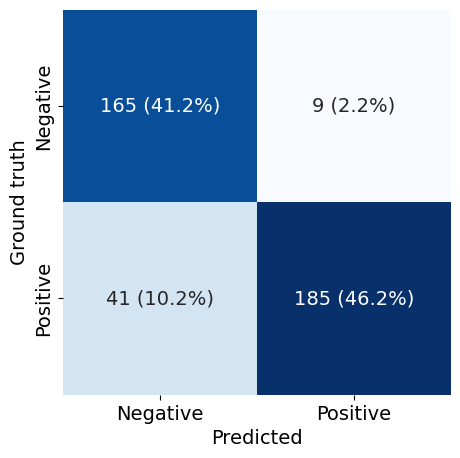

In [13]:
# Create a plot of the confusion matrix
fig = plt.figure(figsize=(5, 5))

# Create the labels with counts and percentages
labels_gpt4o_methods_conclusion = gpt4o_methods_conclusion_crosstab.values.astype(str)
labels_gpt4o_methods_conclusion[0, 0] = f"{labels_gpt4o_methods_conclusion[0, 0]} ({100 * gpt4o_methods_conclusion_tn / (df.shape[0]):.1f}%)"
labels_gpt4o_methods_conclusion[0, 1] = f"{labels_gpt4o_methods_conclusion[0, 1]} ({100 * gpt4o_methods_conclusion_fp / (df.shape[0]):.1f}%)"
labels_gpt4o_methods_conclusion[1, 0] = f"{labels_gpt4o_methods_conclusion[1, 0]} ({100 * gpt4o_methods_conclusion_fn / (df.shape[0]):.1f}%)"
labels_gpt4o_methods_conclusion[1, 1] = f"{labels_gpt4o_methods_conclusion[1, 1]} ({100 * gpt4o_methods_conclusion_tp / (df.shape[0]):.1f}%)"

# Plot the confusion matrix
plt.rcParams.update({"font.size": 14})  # Increase font size
sns.heatmap(gpt4o_methods_conclusion_crosstab, annot=labels_gpt4o_methods_conclusion, fmt="", cmap="Blues")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Ground truth", fontsize=14)
# Remove the colorbar but keep the width of the heatmap
plt.gca().collections[0].colorbar.remove()
plt.savefig("plots/gpt4o_methods_conclusion_confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()  

## Methods, Results, and Conclusion

### GPT-4o mini

In [14]:
# Create a crosstab of the GPT-4o mini predictions when reading only the methods/results/conclusion and the true labels
gpt4omini_methods_results_conclusion_crosstab = pd.crosstab(
    df["Annotation_accept"], df["gpt4omini_temp100_methods_results_conclusion_response_raw"]
)

# Calculate the true positives, false positives, false negatives, and true negatives
gpt4omini_methods_results_conclusion_tp = gpt4omini_methods_results_conclusion_crosstab.loc["Positive", "Positive"]
gpt4omini_methods_results_conclusion_fp = gpt4omini_methods_results_conclusion_crosstab.loc["Negative", "Positive"]
gpt4omini_methods_results_conclusion_fn = gpt4omini_methods_results_conclusion_crosstab.loc["Positive", "Negative"]
gpt4omini_methods_results_conclusion_tn = gpt4omini_methods_results_conclusion_crosstab.loc["Negative", "Negative"]

# Calculate the accuracy, precision, recall, and F1 score
gpt4omini_methods_results_conclusion_accuracy = (gpt4omini_methods_results_conclusion_tp + gpt4omini_methods_results_conclusion_tn) / (gpt4omini_methods_results_conclusion_tp + gpt4omini_methods_results_conclusion_tn + gpt4omini_methods_results_conclusion_fp + gpt4omini_methods_results_conclusion_fn)
gpt4omini_methods_results_conclusion_precision = gpt4omini_methods_results_conclusion_tp / (gpt4omini_methods_results_conclusion_tp + gpt4omini_methods_results_conclusion_fp)
gpt4omini_methods_results_conclusion_recall = gpt4omini_methods_results_conclusion_tp / (gpt4omini_methods_results_conclusion_tp + gpt4omini_methods_results_conclusion_fn)
gpt4omini_methods_results_conclusion_f1 = 2 * (gpt4omini_methods_results_conclusion_precision * gpt4omini_methods_results_conclusion_recall) / (gpt4omini_methods_results_conclusion_precision + gpt4omini_methods_results_conclusion_recall)

# Calculate the 95% confidence interval for the accuracy, precision, recall, and F1 score
gpt4omini_methods_results_conclusion_accuracy_ci = 1.96 * np.sqrt((gpt4omini_methods_results_conclusion_accuracy * (1 - gpt4omini_methods_results_conclusion_accuracy)) / df.shape[0])
gpt4omini_methods_results_conclusion_precision_ci = 1.96 * np.sqrt((gpt4omini_methods_results_conclusion_precision * (1 - gpt4omini_methods_results_conclusion_precision)) / df.shape[0])
gpt4omini_methods_results_conclusion_recall_ci = 1.96 * np.sqrt((gpt4omini_methods_results_conclusion_recall * (1 - gpt4omini_methods_results_conclusion_recall)) / df.shape[0])
gpt4omini_methods_results_conclusion_f1_ci = 1.96 * np.sqrt((gpt4omini_methods_results_conclusion_f1 * (1 - gpt4omini_methods_results_conclusion_f1)) / df.shape[0])

# Print the results
print(f"GPT-4o mini Methods, Results, and Conclusion Accuracy: {gpt4omini_methods_results_conclusion_accuracy:.2f} ({gpt4omini_methods_results_conclusion_accuracy - gpt4omini_methods_results_conclusion_accuracy_ci:.2f} - {gpt4omini_methods_results_conclusion_accuracy + gpt4omini_methods_results_conclusion_accuracy_ci:.2f})")
print(f"GPT-4o mini Methods, Results, and Conclusion Precision: {gpt4omini_methods_results_conclusion_precision:.2f} ({gpt4omini_methods_results_conclusion_precision - gpt4omini_methods_results_conclusion_precision_ci:.2f} - {gpt4omini_methods_results_conclusion_precision + gpt4omini_methods_results_conclusion_precision_ci:.2f})")
print(f"GPT-4o mini Methods, Results, and Conclusion Recall: {gpt4omini_methods_results_conclusion_recall:.2f} ({gpt4omini_methods_results_conclusion_recall - gpt4omini_methods_results_conclusion_recall_ci:.2f} - {gpt4omini_methods_results_conclusion_recall + gpt4omini_methods_results_conclusion_recall_ci:.2f})")
print(f"GPT-4o mini Methods, Results, and Conclusion F1: {gpt4omini_methods_results_conclusion_f1:.2f} ({gpt4omini_methods_results_conclusion_f1 - gpt4omini_methods_results_conclusion_f1_ci:.2f} - {gpt4omini_methods_results_conclusion_f1 + gpt4omini_methods_results_conclusion_f1_ci:.2f})")

GPT-4o mini Methods, Results, and Conclusion Accuracy: 0.92 (0.89 - 0.94)
GPT-4o mini Methods, Results, and Conclusion Precision: 0.95 (0.93 - 0.97)
GPT-4o mini Methods, Results, and Conclusion Recall: 0.90 (0.87 - 0.93)
GPT-4o mini Methods, Results, and Conclusion F1: 0.93 (0.90 - 0.95)


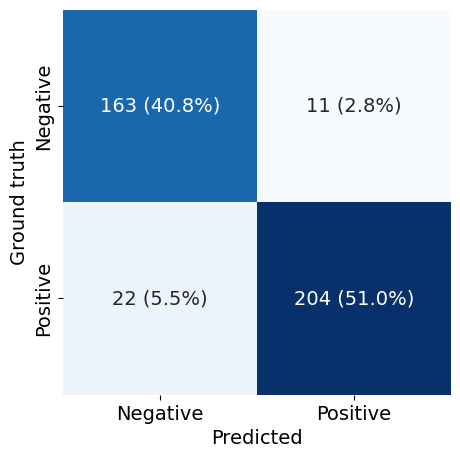

In [15]:
# Create a plot of the confusion matrix
fig = plt.figure(figsize=(5, 5))

# Create the labels with counts and percentages
labels_gpt4omini_methods_results_conclusion = gpt4omini_methods_results_conclusion_crosstab.values.astype(str)
labels_gpt4omini_methods_results_conclusion[0, 0] = f"{labels_gpt4omini_methods_results_conclusion[0, 0]} ({100 * gpt4omini_methods_results_conclusion_tn / (df.shape[0]):.1f}%)"
labels_gpt4omini_methods_results_conclusion[0, 1] = f"{labels_gpt4omini_methods_results_conclusion[0, 1]} ({100 * gpt4omini_methods_results_conclusion_fp / (df.shape[0]):.1f}%)"
labels_gpt4omini_methods_results_conclusion[1, 0] = f"{labels_gpt4omini_methods_results_conclusion[1, 0]} ({100 * gpt4omini_methods_results_conclusion_fn / (df.shape[0]):.1f}%)"
labels_gpt4omini_methods_results_conclusion[1, 1] = f"{labels_gpt4omini_methods_results_conclusion[1, 1]} ({100 * gpt4omini_methods_results_conclusion_tp / (df.shape[0]):.1f}%)"

# Plot the confusion matrix
plt.rcParams.update({"font.size": 14})  # Increase font size
sns.heatmap(gpt4omini_methods_results_conclusion_crosstab, annot=labels_gpt4omini_methods_results_conclusion, fmt="", cmap="Blues")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Ground truth", fontsize=14)
# Remove the colorbar but keep the width of the heatmap
plt.gca().collections[0].colorbar.remove()
plt.savefig("plots/gpt4omini_methods_results_conclusion_confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()  

### GPT-4o

In [16]:
# Create a crosstab of the GPT-4o predictions when reading only the methods/results/conclusion and the true labels
gpt4o_methods_results_conclusion_crosstab = pd.crosstab(
    df["Annotation_accept"], df["gpt4o_temp100_methods_results_conclusion_response_raw"]
)

# Calculate the true positives, false positives, false negatives, and true negatives
gpt4o_methods_results_conclusion_tp = gpt4o_methods_results_conclusion_crosstab.loc["Positive", "Positive"]
gpt4o_methods_results_conclusion_fp = gpt4o_methods_results_conclusion_crosstab.loc["Negative", "Positive"]
gpt4o_methods_results_conclusion_fn = gpt4o_methods_results_conclusion_crosstab.loc["Positive", "Negative"]
gpt4o_methods_results_conclusion_tn = gpt4o_methods_results_conclusion_crosstab.loc["Negative", "Negative"]

# Calculate the accuracy, precision, recall, and F1 score
gpt4o_methods_results_conclusion_accuracy = (gpt4o_methods_results_conclusion_tp + gpt4o_methods_results_conclusion_tn) / (gpt4o_methods_results_conclusion_tp + gpt4o_methods_results_conclusion_tn + gpt4o_methods_results_conclusion_fp + gpt4o_methods_results_conclusion_fn)
gpt4o_methods_results_conclusion_precision = gpt4o_methods_results_conclusion_tp / (gpt4o_methods_results_conclusion_tp + gpt4o_methods_results_conclusion_fp)
gpt4o_methods_results_conclusion_recall = gpt4o_methods_results_conclusion_tp / (gpt4o_methods_results_conclusion_tp + gpt4o_methods_results_conclusion_fn)
gpt4o_methods_results_conclusion_f1 = 2 * (gpt4o_methods_results_conclusion_precision * gpt4o_methods_results_conclusion_recall) / (gpt4o_methods_results_conclusion_precision + gpt4o_methods_results_conclusion_recall)

# Calculate the 95% confidence interval for the accuracy, precision, recall, and F1 score
gpt4o_methods_results_conclusion_accuracy_ci = 1.96 * np.sqrt((gpt4o_methods_results_conclusion_accuracy * (1 - gpt4o_methods_results_conclusion_accuracy)) / df.shape[0])
gpt4o_methods_results_conclusion_precision_ci = 1.96 * np.sqrt((gpt4o_methods_results_conclusion_precision * (1 - gpt4o_methods_results_conclusion_precision)) / df.shape[0])
gpt4o_methods_results_conclusion_recall_ci = 1.96 * np.sqrt((gpt4o_methods_results_conclusion_recall * (1 - gpt4o_methods_results_conclusion_recall)) / df.shape[0])
gpt4o_methods_results_conclusion_f1_ci = 1.96 * np.sqrt((gpt4o_methods_results_conclusion_f1 * (1 - gpt4o_methods_results_conclusion_f1)) / df.shape[0])

# Print the results
print(f"GPT-4o Methods, Results, and Conclusion Accuracy: {gpt4o_methods_results_conclusion_accuracy:.2f} ({gpt4o_methods_results_conclusion_accuracy - gpt4o_methods_results_conclusion_accuracy_ci:.2f} - {gpt4o_methods_results_conclusion_accuracy + gpt4o_methods_results_conclusion_accuracy_ci:.2f})")
print(f"GPT-4o Methods, Results, and Conclusion Precision: {gpt4o_methods_results_conclusion_precision:.2f} ({gpt4o_methods_results_conclusion_precision - gpt4o_methods_results_conclusion_precision_ci:.2f} - {gpt4o_methods_results_conclusion_precision + gpt4o_methods_results_conclusion_precision_ci:.2f})")
print(f"GPT-4o Methods, Results, and Conclusion Recall: {gpt4o_methods_results_conclusion_recall:.2f} ({gpt4o_methods_results_conclusion_recall - gpt4o_methods_results_conclusion_recall_ci:.2f} - {gpt4o_methods_results_conclusion_recall + gpt4o_methods_results_conclusion_recall_ci:.2f})")
print(f"GPT-4o Methods, Results, and Conclusion F1: {gpt4o_methods_results_conclusion_f1:.2f} ({gpt4o_methods_results_conclusion_f1 - gpt4o_methods_results_conclusion_f1_ci:.2f} - {gpt4o_methods_results_conclusion_f1 + gpt4o_methods_results_conclusion_f1_ci:.2f})")


GPT-4o Methods, Results, and Conclusion Accuracy: 0.92 (0.89 - 0.94)
GPT-4o Methods, Results, and Conclusion Precision: 0.97 (0.95 - 0.99)
GPT-4o Methods, Results, and Conclusion Recall: 0.88 (0.85 - 0.91)
GPT-4o Methods, Results, and Conclusion F1: 0.92 (0.90 - 0.95)


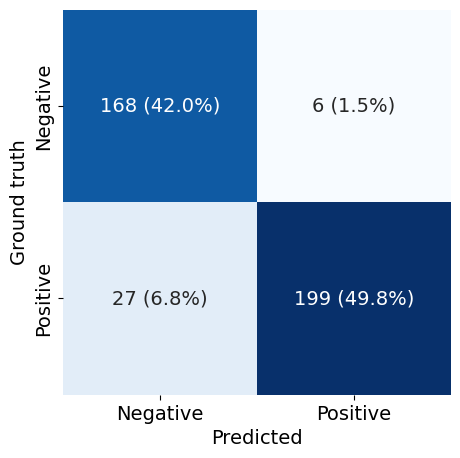

In [17]:
# Create a plot of the confusion matrix
fig = plt.figure(figsize=(5, 5))

# Create the labels with counts and percentages
labels_gpt4o_methods_results_conclusion = gpt4o_methods_results_conclusion_crosstab.values.astype(str)
labels_gpt4o_methods_results_conclusion[0, 0] = f"{labels_gpt4o_methods_results_conclusion[0, 0]} ({100 * gpt4o_methods_results_conclusion_tn / (df.shape[0]):.1f}%)"
labels_gpt4o_methods_results_conclusion[0, 1] = f"{labels_gpt4o_methods_results_conclusion[0, 1]} ({100 * gpt4o_methods_results_conclusion_fp / (df.shape[0]):.1f}%)"
labels_gpt4o_methods_results_conclusion[1, 0] = f"{labels_gpt4o_methods_results_conclusion[1, 0]} ({100 * gpt4o_methods_results_conclusion_fn / (df.shape[0]):.1f}%)"
labels_gpt4o_methods_results_conclusion[1, 1] = f"{labels_gpt4o_methods_results_conclusion[1, 1]} ({100 * gpt4o_methods_results_conclusion_tp / (df.shape[0]):.1f}%)"

# Plot the confusion matrix
plt.rcParams.update({"font.size": 14})  # Increase font size
sns.heatmap(gpt4o_methods_results_conclusion_crosstab, annot=labels_gpt4o_methods_results_conclusion, fmt="", cmap="Blues")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Ground truth", fontsize=14)
# Remove the colorbar but keep the width of the heatmap
plt.gca().collections[0].colorbar.remove()
plt.savefig("plots/gpt4o_methods_results_conclusion_confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()  


## Title and Abstract

### GPT-4o mini


In [18]:
# Create a crosstab of the GPT-4o mini predictions when reading the title/abstract and the true labels
gpt4omini_title_abstract_crosstab = pd.crosstab(
    df["Annotation_accept"], df["gpt4omini_temp100_title_abstract_response_raw"]
)

# Calculate the true positives, false positives, false negatives, and true negatives
gpt4omini_title_abstract_tp = gpt4omini_title_abstract_crosstab.loc["Positive", "Positive"]
gpt4omini_title_abstract_fp = gpt4omini_title_abstract_crosstab.loc["Negative", "Positive"]
gpt4omini_title_abstract_fn = gpt4omini_title_abstract_crosstab.loc["Positive", "Negative"]
gpt4omini_title_abstract_tn = gpt4omini_title_abstract_crosstab.loc["Negative", "Negative"]

# Calculate the accuracy, precision, recall, and F1 score
gpt4omini_title_abstract_accuracy = (gpt4omini_title_abstract_tp + gpt4omini_title_abstract_tn) / (gpt4omini_title_abstract_tp + gpt4omini_title_abstract_tn + gpt4omini_title_abstract_fp + gpt4omini_title_abstract_fn)
gpt4omini_title_abstract_precision = gpt4omini_title_abstract_tp / (gpt4omini_title_abstract_tp + gpt4omini_title_abstract_fp)
gpt4omini_title_abstract_recall = gpt4omini_title_abstract_tp / (gpt4omini_title_abstract_tp + gpt4omini_title_abstract_fn)
gpt4omini_title_abstract_f1 = 2 * (gpt4omini_title_abstract_precision * gpt4omini_title_abstract_recall) / (gpt4omini_title_abstract_precision + gpt4omini_title_abstract_recall)

# Calculate the 95% confidence interval for the accuracy, precision, recall, and F1 score
gpt4omini_title_abstract_accuracy_ci = 1.96 * np.sqrt((gpt4omini_title_abstract_accuracy * (1 - gpt4omini_title_abstract_accuracy)) / df.shape[0])
gpt4omini_title_abstract_precision_ci = 1.96 * np.sqrt((gpt4omini_title_abstract_precision * (1 - gpt4omini_title_abstract_precision)) / df.shape[0])
gpt4omini_title_abstract_recall_ci = 1.96 * np.sqrt((gpt4omini_title_abstract_recall * (1 - gpt4omini_title_abstract_recall)) / df.shape[0])
gpt4omini_title_abstract_f1_ci = 1.96 * np.sqrt((gpt4omini_title_abstract_f1 * (1 - gpt4omini_title_abstract_f1)) / df.shape[0])

# Print the results
print(f"GPT-4o mini Title and Abstract Accuracy: {gpt4omini_title_abstract_accuracy:.2f} ({gpt4omini_title_abstract_accuracy - gpt4omini_title_abstract_accuracy_ci:.2f} - {gpt4omini_title_abstract_accuracy + gpt4omini_title_abstract_accuracy_ci:.2f})")
print(f"GPT-4o mini Title and Abstract Precision: {gpt4omini_title_abstract_precision:.2f} ({gpt4omini_title_abstract_precision - gpt4omini_title_abstract_precision_ci:.2f} - {gpt4omini_title_abstract_precision + gpt4omini_title_abstract_precision_ci:.2f})")
print(f"GPT-4o mini Title and Abstract Recall: {gpt4omini_title_abstract_recall:.2f} ({gpt4omini_title_abstract_recall - gpt4omini_title_abstract_recall_ci:.2f} - {gpt4omini_title_abstract_recall + gpt4omini_title_abstract_recall_ci:.2f})")
print(f"GPT-4o mini Title and Abstract F1: {gpt4omini_title_abstract_f1:.2f} ({gpt4omini_title_abstract_f1 - gpt4omini_title_abstract_f1_ci:.2f} - {gpt4omini_title_abstract_f1 + gpt4omini_title_abstract_f1_ci:.2f})")


GPT-4o mini Title and Abstract Accuracy: 0.92 (0.90 - 0.95)
GPT-4o mini Title and Abstract Precision: 0.97 (0.95 - 0.98)
GPT-4o mini Title and Abstract Recall: 0.89 (0.86 - 0.92)
GPT-4o mini Title and Abstract F1: 0.93 (0.90 - 0.95)


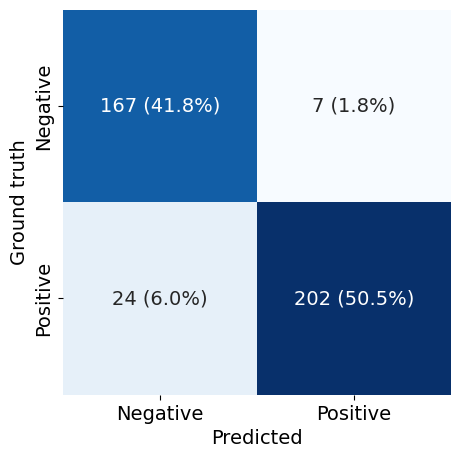

In [19]:
# Create a plot of the confusion matrix
fig = plt.figure(figsize=(5, 5))

# Create the labels with counts and percentages
labels_gpt4omini_title_abstract = gpt4omini_title_abstract_crosstab.values.astype(str)
labels_gpt4omini_title_abstract[0, 0] = f"{labels_gpt4omini_title_abstract[0, 0]} ({100 * gpt4omini_title_abstract_tn / (df.shape[0]):.1f}%)"
labels_gpt4omini_title_abstract[0, 1] = f"{labels_gpt4omini_title_abstract[0, 1]} ({100 * gpt4omini_title_abstract_fp / (df.shape[0]):.1f}%)"
labels_gpt4omini_title_abstract[1, 0] = f"{labels_gpt4omini_title_abstract[1, 0]} ({100 * gpt4omini_title_abstract_fn / (df.shape[0]):.1f}%)"
labels_gpt4omini_title_abstract[1, 1] = f"{labels_gpt4omini_title_abstract[1, 1]} ({100 * gpt4omini_title_abstract_tp / (df.shape[0]):.1f}%)"

# Plot the confusion matrix
plt.rcParams.update({"font.size": 14})  # Increase font size
sns.heatmap(gpt4omini_title_abstract_crosstab, annot=labels_gpt4omini_title_abstract, fmt="", cmap="Blues")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Ground truth", fontsize=14)
# Remove the colorbar but keep the width of the heatmap
plt.gca().collections[0].colorbar.remove()
plt.savefig("plots/gpt4omini_title_abstract_confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()  


### GPT-4o

In [20]:
# Create a crosstab of the GPT-4o predictions when reading the title/abstract and the true labels
gpt4o_title_abstract_crosstab = pd.crosstab(
    df["Annotation_accept"], df["gpt4o_temp100_title_abstract_response_raw"]
)

# Calculate the true positives, false positives, false negatives, and true negatives
gpt4o_title_abstract_tp = gpt4o_title_abstract_crosstab.loc["Positive", "Positive"]
gpt4o_title_abstract_fp = gpt4o_title_abstract_crosstab.loc["Negative", "Positive"]
gpt4o_title_abstract_fn = gpt4o_title_abstract_crosstab.loc["Positive", "Negative"]
gpt4o_title_abstract_tn = gpt4o_title_abstract_crosstab.loc["Negative", "Negative"]

# Calculate the accuracy, precision, recall, and F1 score
gpt4o_title_abstract_accuracy = (gpt4o_title_abstract_tp + gpt4o_title_abstract_tn) / (gpt4o_title_abstract_tp + gpt4o_title_abstract_tn + gpt4o_title_abstract_fp + gpt4o_title_abstract_fn)
gpt4o_title_abstract_precision = gpt4o_title_abstract_tp / (gpt4o_title_abstract_tp + gpt4o_title_abstract_fp)
gpt4o_title_abstract_recall = gpt4o_title_abstract_tp / (gpt4o_title_abstract_tp + gpt4o_title_abstract_fn)
gpt4o_title_abstract_f1 = 2 * (gpt4o_title_abstract_precision * gpt4o_title_abstract_recall) / (gpt4o_title_abstract_precision + gpt4o_title_abstract_recall)

# Calculate the 95% confidence interval for the accuracy, precision, recall, and F1 score
gpt4o_title_abstract_accuracy_ci = 1.96 * np.sqrt((gpt4o_title_abstract_accuracy * (1 - gpt4o_title_abstract_accuracy)) / df.shape[0])
gpt4o_title_abstract_precision_ci = 1.96 * np.sqrt((gpt4o_title_abstract_precision * (1 - gpt4o_title_abstract_precision)) / df.shape[0])
gpt4o_title_abstract_recall_ci = 1.96 * np.sqrt((gpt4o_title_abstract_recall * (1 - gpt4o_title_abstract_recall)) / df.shape[0])
gpt4o_title_abstract_f1_ci = 1.96 * np.sqrt((gpt4o_title_abstract_f1 * (1 - gpt4o_title_abstract_f1)) / df.shape[0])

# Print the results
print(f"GPT-4o Title and Abstract Accuracy: {gpt4o_title_abstract_accuracy:.2f} ({gpt4o_title_abstract_accuracy - gpt4o_title_abstract_accuracy_ci:.2f} - {gpt4o_title_abstract_accuracy + gpt4o_title_abstract_accuracy_ci:.2f})")
print(f"GPT-4o Title and Abstract Precision: {gpt4o_title_abstract_precision:.2f} ({gpt4o_title_abstract_precision - gpt4o_title_abstract_precision_ci:.2f} - {gpt4o_title_abstract_precision + gpt4o_title_abstract_precision_ci:.2f})")
print(f"GPT-4o Title and Abstract Recall: {gpt4o_title_abstract_recall:.2f} ({gpt4o_title_abstract_recall - gpt4o_title_abstract_recall_ci:.2f} - {gpt4o_title_abstract_recall + gpt4o_title_abstract_recall_ci:.2f})")
print(f"GPT-4o Title and Abstract F1: {gpt4o_title_abstract_f1:.2f} ({gpt4o_title_abstract_f1 - gpt4o_title_abstract_f1_ci:.2f} - {gpt4o_title_abstract_f1 + gpt4o_title_abstract_f1_ci:.2f})")

GPT-4o Title and Abstract Accuracy: 0.92 (0.89 - 0.94)
GPT-4o Title and Abstract Precision: 0.98 (0.97 - 0.99)
GPT-4o Title and Abstract Recall: 0.87 (0.84 - 0.90)
GPT-4o Title and Abstract F1: 0.92 (0.90 - 0.95)


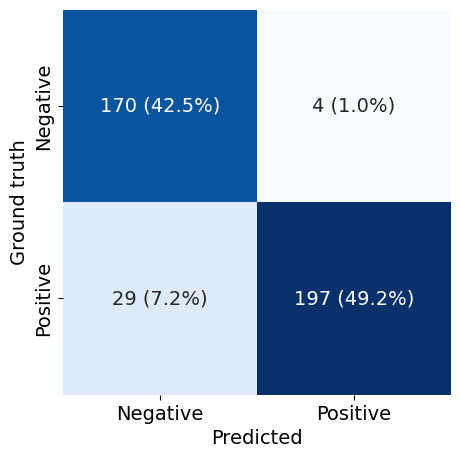

In [21]:
# Create a plot of the confusion matrix
fig = plt.figure(figsize=(5, 5))

# Create the labels with counts and percentages
labels_gpt4o_title_abstract = gpt4o_title_abstract_crosstab.values.astype(str)
labels_gpt4o_title_abstract[0, 0] = f"{labels_gpt4o_title_abstract[0, 0]} ({100 * gpt4o_title_abstract_tn / (df.shape[0]):.1f}%)"
labels_gpt4o_title_abstract[0, 1] = f"{labels_gpt4o_title_abstract[0, 1]} ({100 * gpt4o_title_abstract_fp / (df.shape[0]):.1f}%)"
labels_gpt4o_title_abstract[1, 0] = f"{labels_gpt4o_title_abstract[1, 0]} ({100 * gpt4o_title_abstract_fn / (df.shape[0]):.1f}%)"
labels_gpt4o_title_abstract[1, 1] = f"{labels_gpt4o_title_abstract[1, 1]} ({100 * gpt4o_title_abstract_tp / (df.shape[0]):.1f}%)"

# Plot the confusion matrix
plt.rcParams.update({"font.size": 14})  # Increase font size
sns.heatmap(gpt4o_title_abstract_crosstab, annot=labels_gpt4o_title_abstract, fmt="", cmap="Blues")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Ground truth", fontsize=14)
# Remove the colorbar but keep the width of the heatmap
plt.gca().collections[0].colorbar.remove()
plt.savefig("plots/gpt4o_title_abstract_confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()  